In [1]:
eval_dicts = {
    "cifar10-c-calib": "279248034225110540/506d9d588d0f459680ca8a4108f85036/artifacts/eval_dict",
    "cifar10-c-expl": "298139550611321154/651f7e5bfe534c639c4f5b2eba5bde37/artifacts/eval_dict",
    "svhn-c-calib": "382722780317026903/78d91c5e24624425af327005aade7358/artifacts/eval_dict",
    "svhn-c-expl": "354955436886369284/b90c9c1d94cb41dd801ebea1528e6460/artifacts/eval_dict",
}
pre_path = "/data_docker/mlartifacts/"

In [2]:
noise = ["gaussian_noise", "shot_noise", "impulse_noise"]
blur = ["defocus_blur", "glass_blur", "motion_blur", "zoom_blur"]
weather = ["snow", "frost", "fog"]
digital = ["brightness", "contrast", "elastic_transform", "pixelate", "jpeg_compression"]
corruptions = noise + blur + weather + digital

# Corruption plots

In [3]:
import json

svhn_calib_path = pre_path + eval_dicts["svhn-c-calib"]
svhn_calib = {}
with open(svhn_calib_path) as json_file:
    svhn_calib = json.load(json_file)

cifar10_calib_path = pre_path + eval_dicts["cifar10-c-calib"]
cifar10_calib = {}
with open(cifar10_calib_path) as json_file:
    cifar10_calib = json.load(json_file)

dataset = "CIFAR10"
if dataset == "SVHN":
    eval_dict = svhn_calib
elif dataset == "CIFAR10":
    eval_dict = cifar10_calib

In [4]:
import numpy as np

noise_accs = []
noise_lls = []
noise_ent = []
blur_accs = []
blur_lls = []
blur_ent = []
weather_accs = []
weather_lls = []
weather_ent = []
digital_accs = []
digital_lls = []
digital_ent = []

for corruption in corruptions:
    backbone_accs = [
        eval_dict[corruption][severity]["backbone_acc"]
        for severity in eval_dict[corruption]
    ]
    einet_accs = [
        eval_dict[corruption][severity]["einet_acc"]
        for severity in eval_dict[corruption]
    ]
    lls_marg = [
        eval_dict[corruption][severity]["ll_marg"]
        for severity in eval_dict[corruption]
    ]
    entropy = [
        eval_dict[corruption][severity]["entropy"]
        for severity in eval_dict[corruption]
    ]
    if corruption in noise:
        noise_accs.append(backbone_accs)
        noise_lls.append(lls_marg)
        noise_ent.append(entropy)
    elif corruption in blur:
        blur_accs.append(backbone_accs)
        blur_lls.append(lls_marg)
        blur_ent.append(entropy)
    elif corruption in weather:
        weather_accs.append(backbone_accs)
        weather_lls.append(lls_marg)
        weather_ent.append(entropy)
    elif corruption in digital:
        digital_accs.append(backbone_accs)
        digital_lls.append(lls_marg)
        digital_ent.append(entropy)
noise_accs = np.array(noise_accs) 
noise_lls = np.array(noise_lls)
noise_ent = np.array(noise_ent)
blur_accs = np.array(blur_accs)
blur_lls = np.array(blur_lls)
blur_ent = np.array(blur_ent)
weather_accs = np.array(weather_accs)
weather_lls = np.array(weather_lls)
weather_ent = np.array(weather_ent)
digital_accs = np.array(digital_accs)
digital_lls = np.array(digital_lls)
digital_ent = np.array(digital_ent)

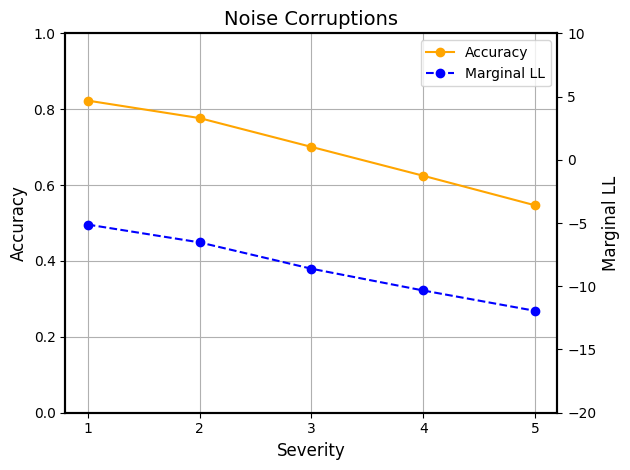

/tmp/ipykernel_24695/2352330657.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


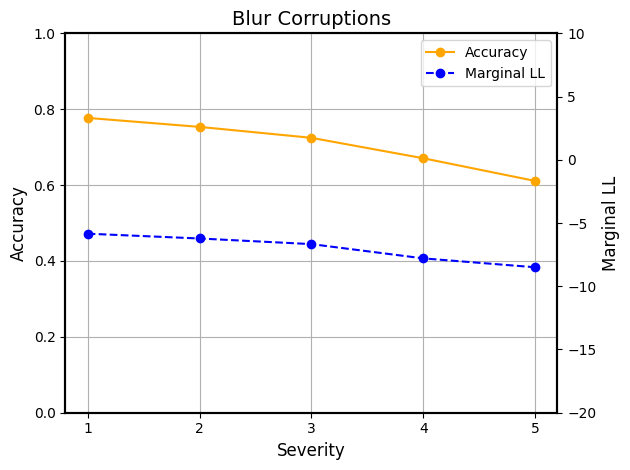

/tmp/ipykernel_24695/2352330657.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


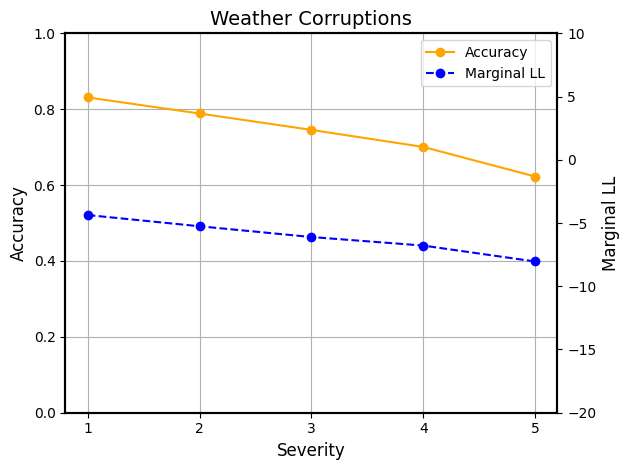

/tmp/ipykernel_24695/2352330657.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


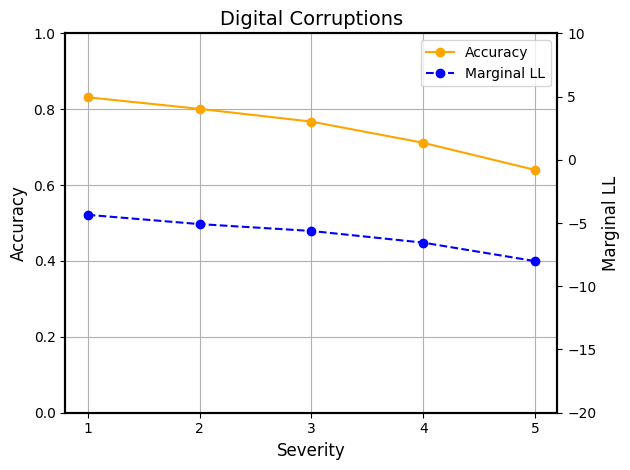

/tmp/ipykernel_24695/2352330657.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


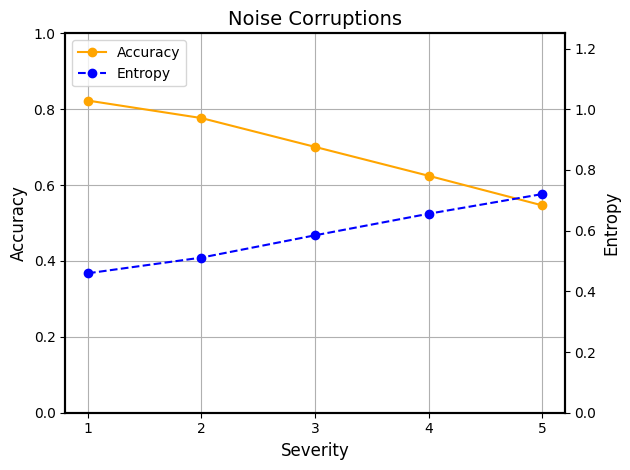

/tmp/ipykernel_24695/2352330657.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


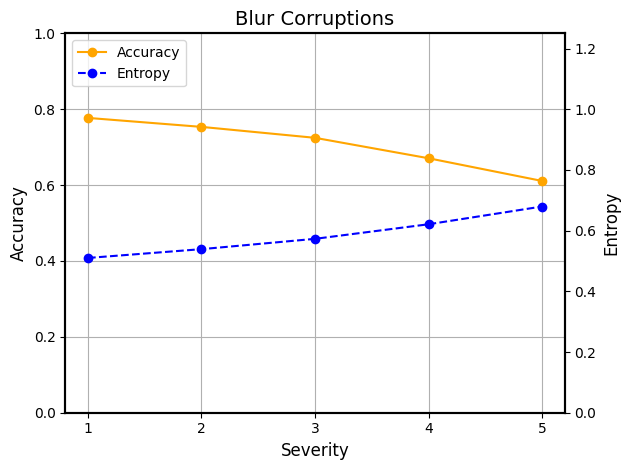

/tmp/ipykernel_24695/2352330657.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


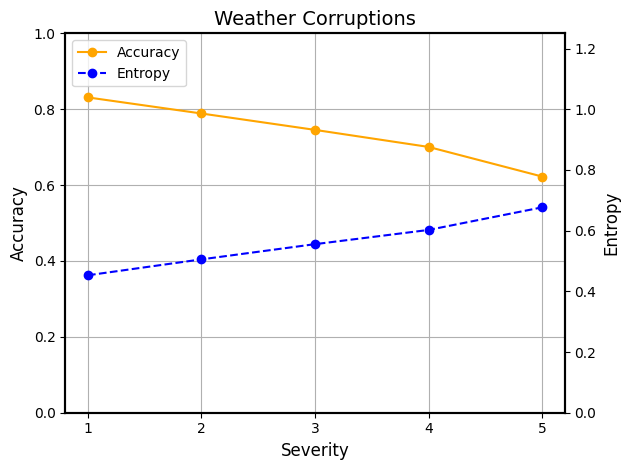

/tmp/ipykernel_24695/2352330657.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


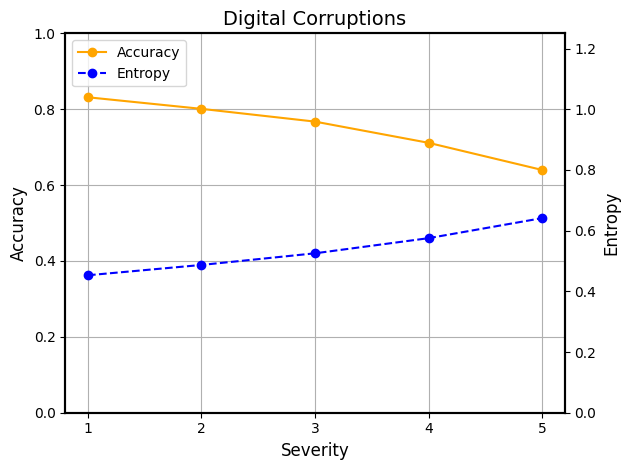

/tmp/ipykernel_24695/2352330657.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [5]:
from plotting_utils import uncert_corrupt_plot
import matplotlib.pyplot as plt
fig = uncert_corrupt_plot(
    noise_accs.mean(axis=0), noise_lls.mean(axis=0), "Noise Corruptions", mode="ll"
)
fig.show()
fig.savefig(f"noise_ll_{dataset}.pdf")

fig = uncert_corrupt_plot(
    blur_accs.mean(axis=0), blur_lls.mean(axis=0), "Blur Corruptions", mode="ll"
)
fig.show()
fig.savefig(f"blur_ll_{dataset}.pdf")

fig = uncert_corrupt_plot(
    weather_accs.mean(axis=0), weather_lls.mean(axis=0), "Weather Corruptions", mode="ll"
)
fig.show()
fig.savefig(f"weather_ll_{dataset}.pdf")

fig = uncert_corrupt_plot(
    digital_accs.mean(axis=0), digital_lls.mean(axis=0), "Digital Corruptions", mode="ll"
)
fig.show()
fig.savefig(f"digital_ll_{dataset}.pdf")

fig = uncert_corrupt_plot(
    noise_accs.mean(axis=0), noise_ent.mean(axis=0), "Noise Corruptions", mode="ent"
)
fig.show()
fig.savefig(f"noise_ent_{dataset}.pdf")

fig = uncert_corrupt_plot(
    blur_accs.mean(axis=0), blur_ent.mean(axis=0), "Blur Corruptions", mode="ent"
)
fig.show()
fig.savefig(f"blur_ent_{dataset}.pdf")

fig = uncert_corrupt_plot(
    weather_accs.mean(axis=0), weather_ent.mean(axis=0), "Weather Corruptions", mode="ent"
)
fig.show()
fig.savefig(f"weather_ent_{dataset}.pdf")

fig = uncert_corrupt_plot(
    digital_accs.mean(axis=0), digital_ent.mean(axis=0), "Digital Corruptions", mode="ent"
)
fig.show()
fig.savefig(f"digital_ent_{dataset}.pdf")
